In [5]:
import os
import torch
from prepare_datasets import prepare_datasets
from data_preprocessing import set_seed
from perform_grid_search import perform_grid_search
from train_test import train, validate
from model import GAT
from data_preprocessing import GraphDataset, collate_fn
from dgl.dataloading import GraphDataLoader
from sklearn.metrics import accuracy_score, f1_score
from performance_visualizations import plot_hyperparameter_boxplots
import pandas as pd

In [8]:
# Set random seed for reproducibility
set_seed(42)
base_dir = os.path.dirname(os.getcwd())

In [9]:
# Prepare datasets
datasets, feature_names_sc, feature_names_combined = prepare_datasets(base_dir, test_size = 0.15, random_state = 42)

In [10]:
dataset_name = 'sc_fc'
train_graphs = datasets[f'train_graphs_{dataset_name}']
train_labels = datasets[f'train_labels_{dataset_name}']
test_graphs = datasets[f'test_graphs_{dataset_name}']
test_labels = datasets[f'test_labels_{dataset_name}']

In [11]:
# First hyperparameter grid
param_grid = {
    'num_heads': [1, 2, 3, 4],
    'out_channels': [8, 16],
    'num_epochs': [5],
    'learning_rate': [1e-1, 1e-2, 1e-3, 1e-4],
    'weight_decay': [0, 1e-5, 1e-4]
}

In [12]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Perform grid search with K-fold cross-validation on the training set
best_params, best_val_f1, best_val_accuracy, results_df = perform_grid_search(
    train_graphs=train_graphs,
    train_labels=train_labels,
    num_splits=5,
    param_grid=param_grid,
    batch_size=32,
    model_class=GAT,
    device=device
)

In [ ]:
print("Best Hyperparameters (based on average validation F1):")
print(best_params)
print(f"Best Average Validation F1 Score: {best_val_f1}")
print(f"Best Average Validation Accuracy: {best_val_accuracy}")

Best Hyperparameters:
{'num_heads': 2.0, 'out_channels': 16.0, 'learning_rate': 0.1, 'weight_decay': 1e-05}
Best Validation F1 Score: 0.8041493295293624
Best Validation Accuracy: 0.8092473118279571


In [ ]:
# Save results_df to a CSV file for later analysis
#results_df.to_csv('first_grid_search_sc_combined.csv', index=False)

In [1]:
import pandas as pd
results_df_1 = pd.read_csv('first_grid_search_sc_combined.csv')

In [51]:
from performance_visualizations import get_top_results

top_results_df_1 = get_top_results(
    results_df=results_df_1,
    hyperparameters=['learning_rate', 'num_heads', 'weight_decay', 'out_channels'],
    metric='val_f1',
    percentile=2,
    print_flag=True
)

c:\Users\barbo\brain classifier repo\brain_classifier\src1\performance_visualizations.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_results_df[hyperparameters] = top_results_df[hyperparameters].round(3)


,fold,val_f1,learning_rate,num_heads,weight_decay,out_channels
114,5,0.879212,0.10,4,0.0,16
4,5,0.840513,0.10,1,0.0,8
84,5,0.840000,0.10,3,0.0,16
15,1,0.840000,0.10,1,0.0,16
29,5,0.840000,0.10,1,0.0,16
49,5,0.837333,0.10,2,0.0,16
52,3,0.832222,0.10,2,0.0,16
37,3,0.832222,0.10,2,0.0,8
238,4,0.832222,0.01,4,0.0,16
434,5,0.832222,0.00,3,0.0,8


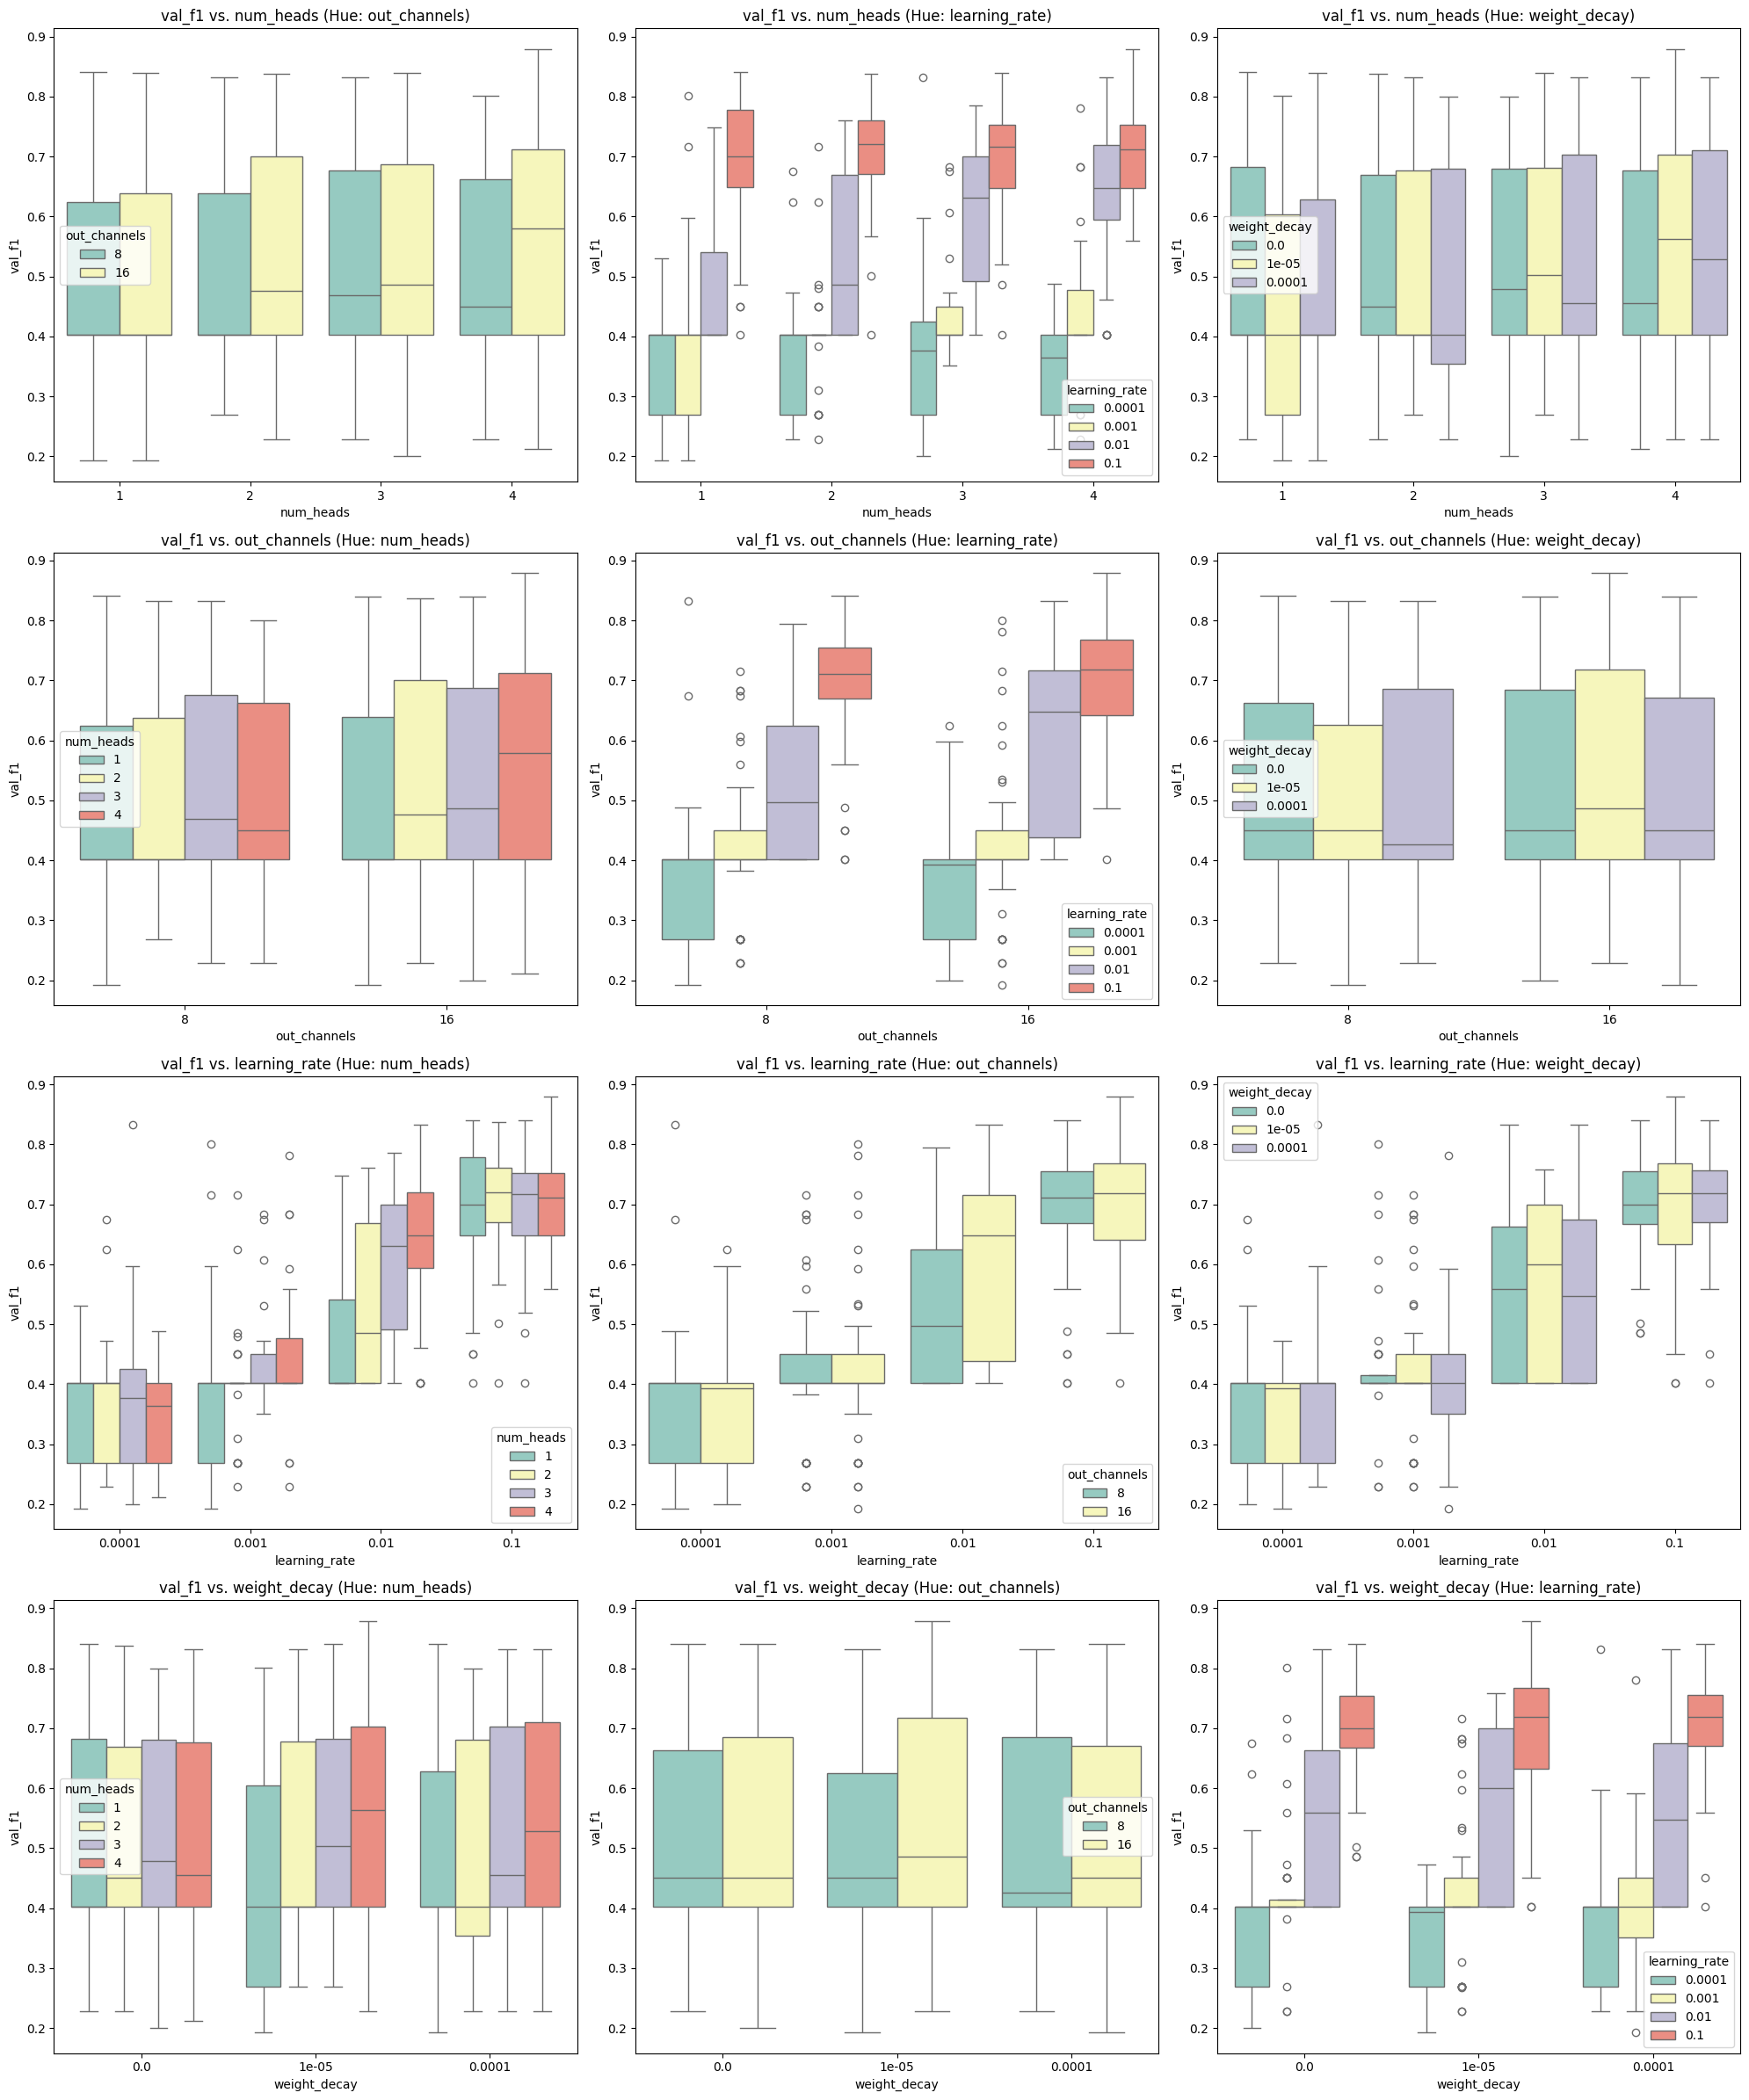

In [ ]:
from performance_visualizations import plot_hyperparameter_boxplots
plot_hyperparameter_boxplots(
    results_df=results_df_1,
    hyperparameters=['num_heads', 'out_channels', 'learning_rate', 'weight_decay'],
    metric='val_f1',
    use_hue=True
)

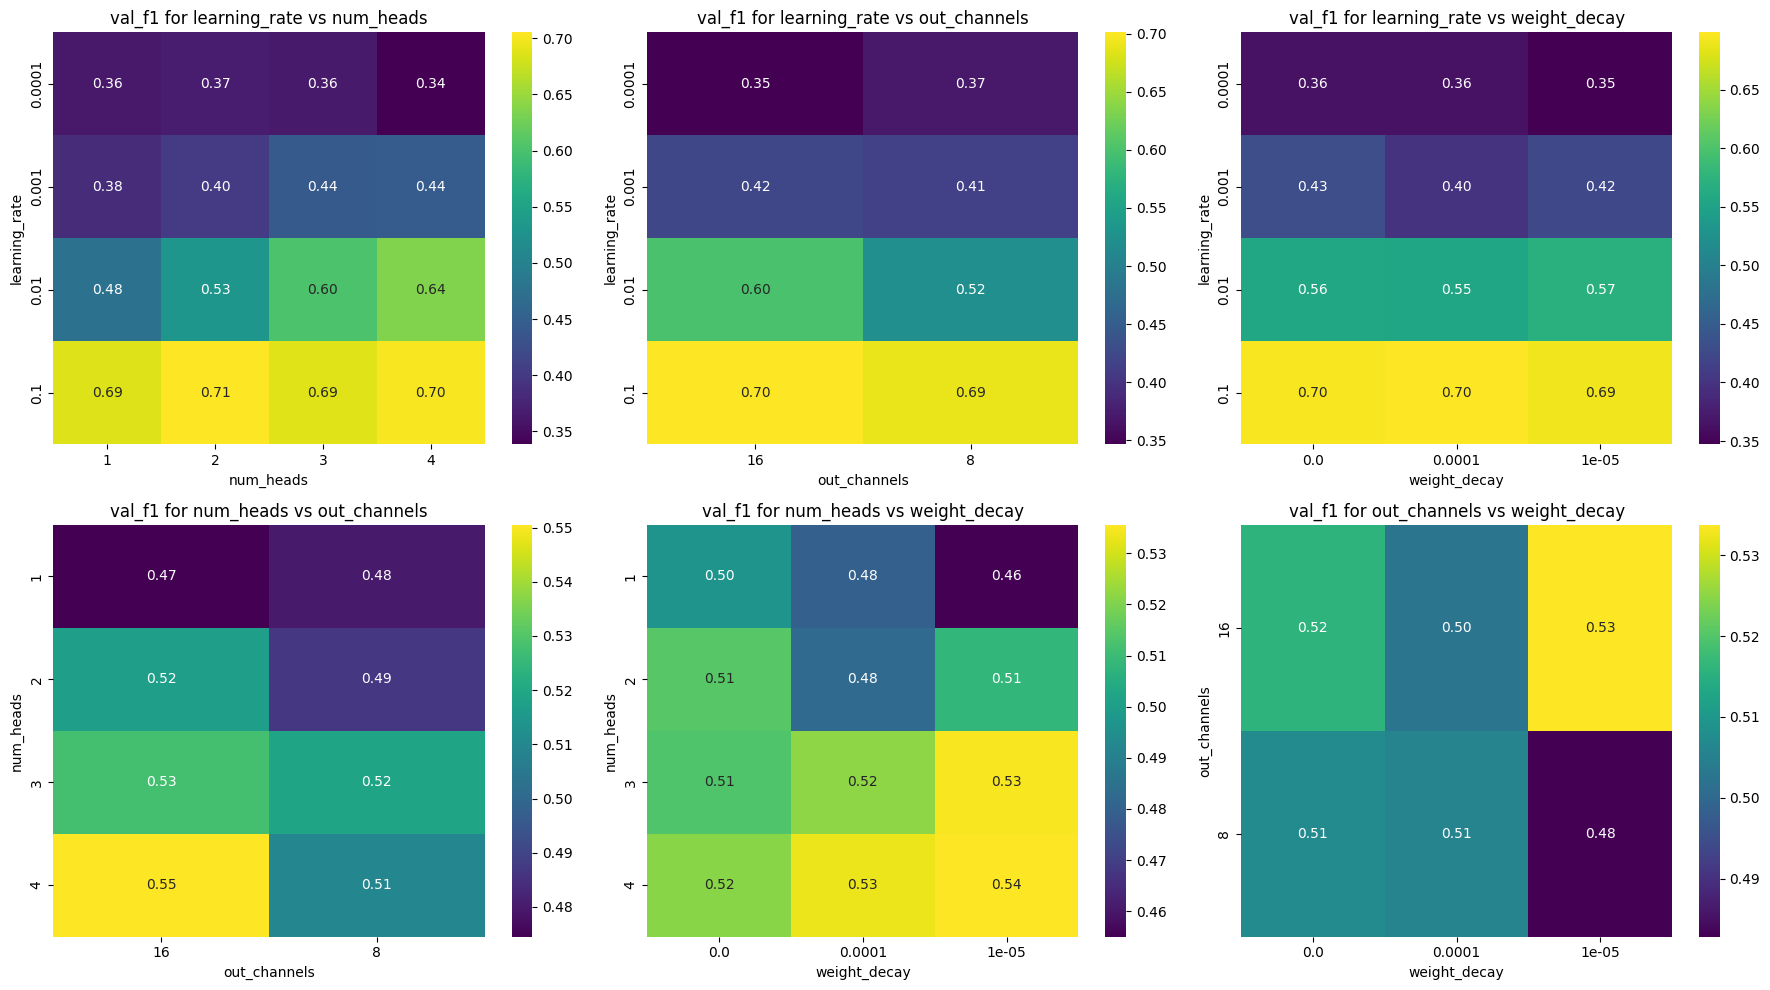

In [ ]:
from performance_visualizations import plot_hyperparameter_heatmaps
plot_hyperparameter_heatmaps(
    results_df=results_df_1,
    hyperparameters=['learning_rate', 'num_heads', 'out_channels', 'weight_decay'],
    metric='val_f1'
)

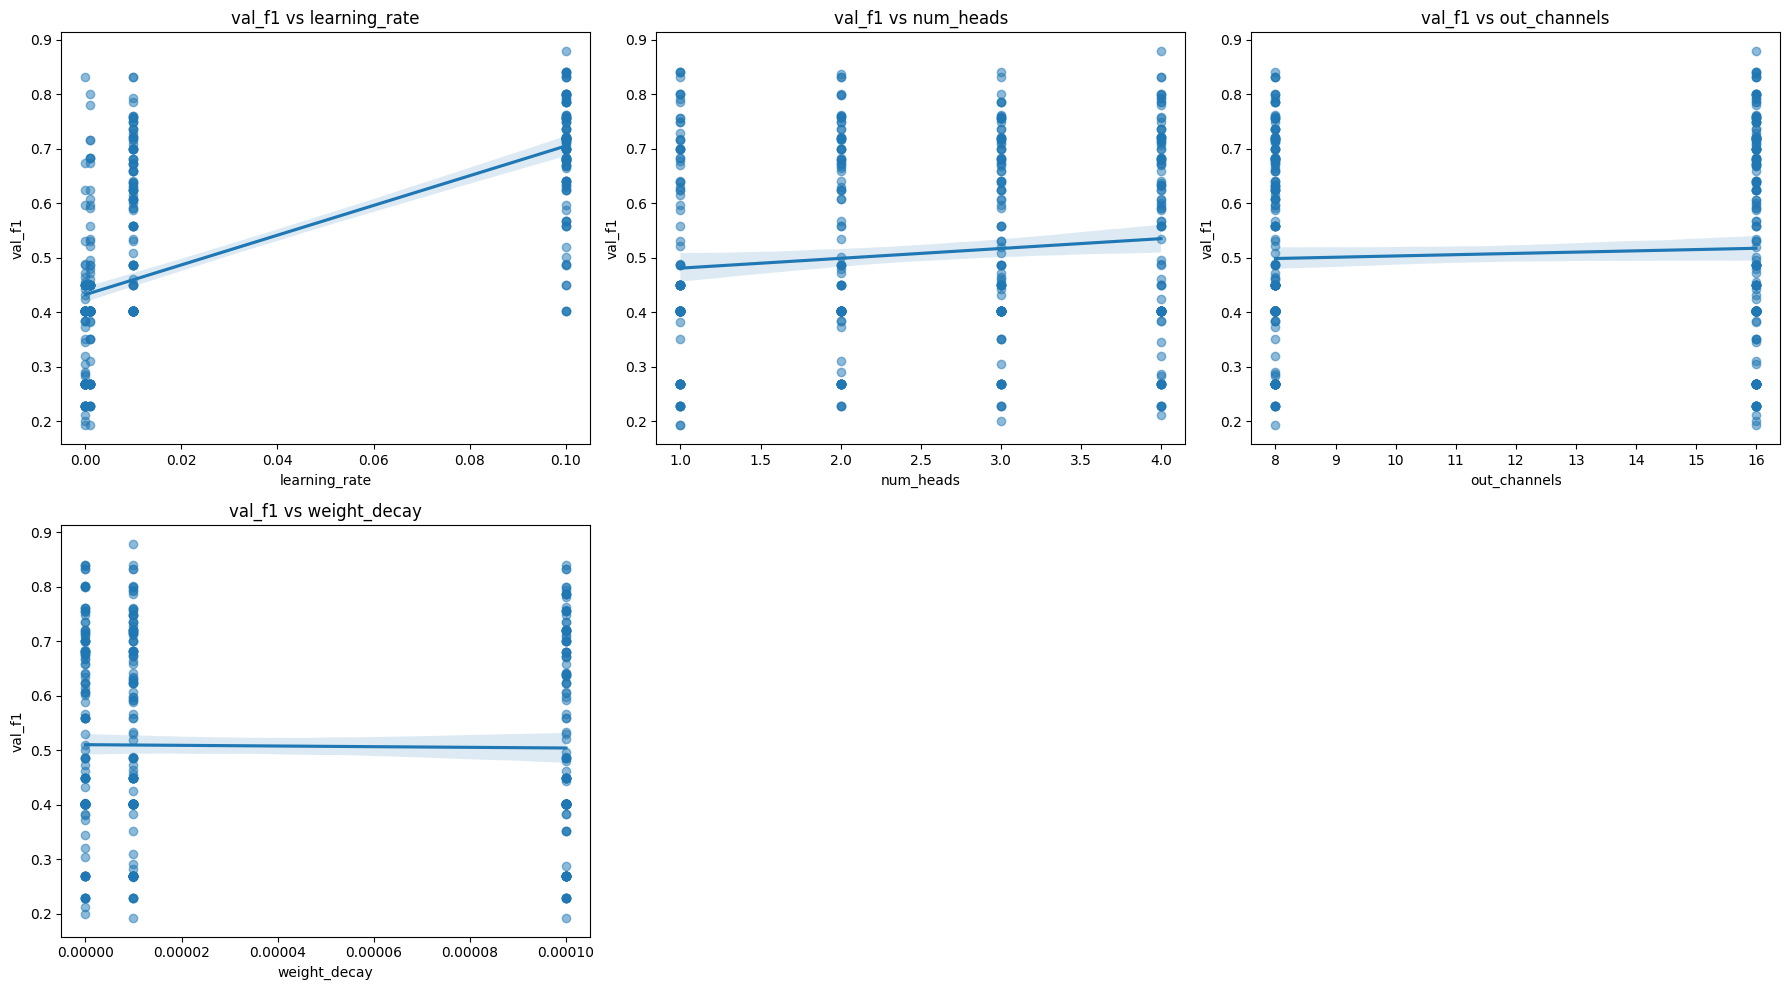

In [25]:
from performance_visualizations import plot_hyperparameter_scatterplots_with_regression
plot_hyperparameter_scatterplots_with_regression(
    results_df=results_df_1,
    hyperparameters=['learning_rate', 'num_heads', 'out_channels', 'weight_decay'],
    metric='val_f1'
)

In [3]:
"""
from performance_visualizations import plot_parallel_coordinates
plot_parallel_coordinates(
    results_df=results_df,
    hyperparameters=['learning_rate', 'num_heads', 'out_channels', 'weight_decay'],
    metric='val_f1',
    top_percentile=10
)
"""

"\nfrom performance_visualizations import plot_parallel_coordinates\nplot_parallel_coordinates(\n    results_df=results_df,\n    hyperparameters=['learning_rate', 'num_heads', 'out_channels', 'weight_decay'],\n    metric='val_f1',\n    top_percentile=10\n)\n"

In [29]:
# Second hyperparameter grid
param_grid = {
    'num_heads': [3, 4],
    'out_channels': [16],
    'num_epochs': [10],
    'learning_rate': [1e-1, 1e-2],
    'weight_decay': [0, 1e-5]
}

In [30]:
# Perform second grid search with K-fold cross-validation on the training set
best_params, best_val_f1, best_val_accuracy, results_df = perform_grid_search(
    train_graphs=train_graphs,
    train_labels=train_labels,
    num_splits=5,
    param_grid=param_grid,
    batch_size=32,
    model_class=GAT,
    device=device
)

In [53]:
print("Best Hyperparameters (based on average validation F1):")
print(best_params)
print(f"Best Average Validation F1 Score: {best_val_f1}")
print(f"Best Average Validation Accuracy: {best_val_accuracy}")

Best Hyperparameters (based on average validation F1):
{'num_heads': 4.0, 'out_channels': 16.0, 'learning_rate': 0.01, 'weight_decay': 0.0}
Best Average Validation F1 Score: 0.7742508162308672
Best Average Validation Accuracy: 0.7763440860215054


In [41]:
# Save results_df to a CSV file for later analysis
results_df.to_csv('second_grid_search_sc_combined.csv', index=False)

In [5]:
import pandas as pd
results_df_2 = pd.read_csv('second_grid_search_sc_combined.csv')

In [52]:
top_results_df_2 = get_top_results(
    results_df=results_df_2,
    hyperparameters=['learning_rate', 'num_heads', 'weight_decay', 'out_channels'],
    metric='val_f1',
    percentile=20,
    print_flag=True
)

c:\Users\barbo\brain classifier repo\brain_classifier\src1\performance_visualizations.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_results_df[hyperparameters] = top_results_df[hyperparameters].round(3)


,fold,val_f1,learning_rate,num_heads,weight_decay,out_channels
1,2,0.867006,0.10,3,0.0,16
26,2,0.835571,0.01,3,0.0,16
36,2,0.835571,0.01,4,0.0,16
11,2,0.806452,0.10,4,0.0,16
32,3,0.800893,0.01,4,0.0,16
6,2,0.800509,0.10,3,0.0,16
24,5,0.792344,0.01,3,0.0,16
29,5,0.792344,0.01,3,0.0,16
34,5,0.792344,0.01,4,0.0,16
